<a href="https://colab.research.google.com/github/aritroo/Lung-Disease-Detection-SEM-VI-Mini-Project-/blob/master/dl3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.datasets import cifar10
from keras.utils import normalize,to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
train_datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,y_train,batch_size=32)

In [ ]:
activation = 'relu'
model = Sequential()
model.add(Conv2D(32,(3,3),activation=activation,padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))


In [ ]:
model.add(Conv2D(64,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64,(3,3),activation=activation,padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation=activation,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch = 250,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


<ipython-input-24-48fe61350f0e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch = 250,epochs=10,validation_data=(X_test,y_test))


250/250 [==============================] - 119s 466ms/step - loss: 2.1780 - accuracy: 0.2635 - val_loss: 1.9054 - val_accuracy: 0.3015
Epoch 2/10
250/250 [==============================] - 85s 337ms/step - loss: 1.8313 - accuracy: 0.3412 - val_loss: 1.6470 - val_accuracy: 0.3936
Epoch 3/10
250/250 [==============================] - 80s 322ms/step - loss: 1.7082 - accuracy: 0.3819 - val_loss: 2.2067 - val_accuracy: 0.2754
Epoch 4/10
250/250 [==============================] - 84s 336ms/step - loss: 1.6233 - accuracy: 0.4141 - val_loss: 2.1359 - val_accuracy: 0.2974
Epoch 5/10
250/250 [==============================] - 85s 339ms/step - loss: 1.5535 - accuracy: 0.4375 - val_loss: 2.1946 - val_accuracy: 0.3328
Epoch 6/10
250/250 [==============================] - 84s 337ms/step - loss: 1.5493 - accuracy: 0.4420 - val_loss: 1.5795 - val_accuracy: 0.4551
Epoch 7/10
250/250 [==============================] - 84s 337ms/step - loss: 1.5084 - accuracy: 0.4524 - val_loss: 1.6950 - val_accuracy: 0.

Text(0, 0.5, 'val_loss')

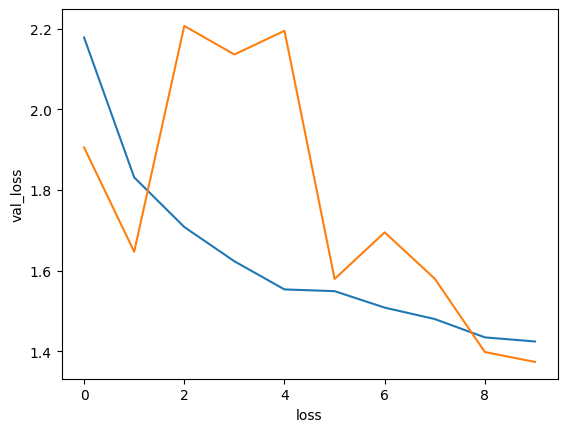

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
